<a href="https://colab.research.google.com/github/Noboru-github/data-analysis-basic-kadai/blob/main/kadai_007/kadai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b15afaa00f3dbd8ba71b46e7deaf33ad972ebc40bdb73d3fffff193f0fe7e67d
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


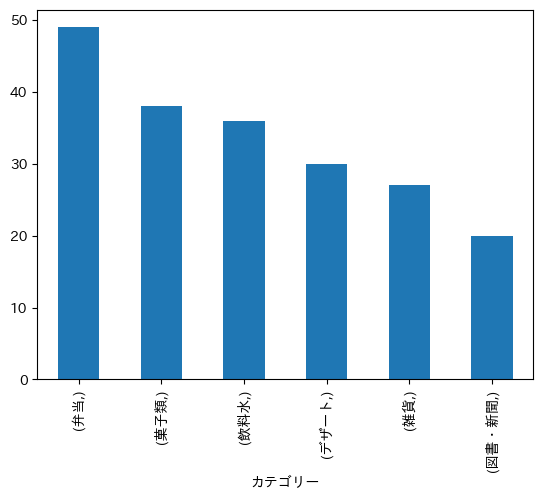

,注文数
商品番号,
1QJFO8QY,1128
2HSTCDWM,588
48XMJXKO,216
8T7D5DQA,528
MESUDVWQ,744
QRMOGNUU,894
S6RE8W6X,666
X0ZE2ZMY,306
YY4HAAZR,540


注文数                                                   
         count       mean        std  min   25%   50%   75%   max
商品番号                                                             
1QJFO8QY  32.0  35.250000  18.461818  0.0  24.0  36.0  49.5  60.0
2HSTCDWM  20.0  29.400000  21.137146  0.0  12.0  27.0  48.0  60.0
48XMJXKO  10.0  21.600000  13.326665  0.0  13.5  21.0  30.0  42.0
8T7D5DQA  21.0  25.142857  18.260027  0.0  12.0  36.0  42.0  54.0
MESUDVWQ  17.0  43.764706  18.219253  0.0  42.0  48.0  54.0  60.0
QRMOGNUU  27.0  33.111111  16.588535  6.0  21.0  36.0  48.0  60.0
S6RE8W6X  20.0  33.300000  21.631118  0.0  12.0  39.0  54.0  60.0
X0ZE2ZMY  14.0  21.857143  21.901377  0.0   1.5  15.0  39.0  60.0
YY4HAAZR  17.0  31.764706  18.095336  0.0  18.0  30.0  42.0  60.0
Z4WOOIYV  22.0  26.727273  19.218498  0.0  12.0  24.0  42.0  60.0

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

df = pd.read_csv('sample_pandas_6.csv')

df.head()

df.query('商品番号 == "Z4WOOIYV"')

df.query('単価 == 600')

df.query('商品番号 == "8T7D5DQA" and 在庫 <= 5')

def tax(x):
    return x * 1.10

df['単価'].apply(tax)

type(df['発注日'].loc[0])

df['発注日'] = pd.to_datetime(df['発注日'])

type(df['発注日'].loc[0])

df.agg({'発注日':['max', 'min']})

tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込み）"
pd.concat([df, tax_series], axis=1)

category_df = pd.read_csv('category.csv')
category_df

df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')


#以下から主にkadai007の内容

#"plot"はpandasのメソッド
cat_counts_bar = df[['カテゴリー']].value_counts().plot(kind='bar')
plt.show(cat_counts_bar)

contents_sum = df.groupby('商品番号')[['注文数']].sum('注文数')
display(contents_sum)

orders_describe = df.groupby('商品番号')[['注文数']].describe()
display(orders_describe)
